In [113]:
''' This is a notbook for kaggle competition to predict Store sales'''

' This is a notbook for kaggle competition to predict Store sales'

Import the libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.options.display.max_rows = 10
pd.options.display.min_rows = 10

Read the csv files

In [115]:
#import train data
df_train = pd.read_csv("../data/store-sales-time-series-forecasting/train.csv")
df_holidays = pd.read_csv("../data/store-sales-time-series-forecasting/holidays_events.csv")
df_oil = pd.read_csv("../data/store-sales-time-series-forecasting/oil.csv")
df_stores = pd.read_csv("../data/store-sales-time-series-forecasting/stores.csv")
df_test = pd.read_csv("../data/store-sales-time-series-forecasting/test.csv")
df_transactions = pd.read_csv("../data/store-sales-time-series-forecasting/transactions.csv")
df_sample_sub = pd.read_csv("../data/store-sales-time-series-forecasting/sample_submission.csv")

Read merged data set

In [116]:
df_merged = pd.read_csv("../data/store-sales-time-series-forecasting/preprocessed_train_data.csv")

C:\Users\sadha\AppData\Local\Temp\ipykernel_25736\3974130489.py:1: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [118]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [119]:
#checking for na data
nulldata=df_train.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_train)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: id, # of Nulls: 0 , NA Percentage: 0.0
Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: family, # of Nulls: 0 , NA Percentage: 0.0
Column: sales, # of Nulls: 0 , NA Percentage: 0.0
Column: onpromotion, # of Nulls: 0 , NA Percentage: 0.0


Train dataset desctiption:
1. The dataset looks clean with no nulls or nas in any of the columns in the train dataset.
2. Time series of features store_nbr, family, and onpromotion as well as the target sales.
3. store_nbr identifies the store at which the products are sold.
4. family identifies the type of product sold.
5. sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
6. onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

In [120]:
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [121]:
nulldata=df_holidays.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_holidays)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: type, # of Nulls: 0 , NA Percentage: 0.0
Column: locale, # of Nulls: 0 , NA Percentage: 0.0
Column: locale_name, # of Nulls: 0 , NA Percentage: 0.0
Column: description, # of Nulls: 0 , NA Percentage: 0.0
Column: transferred, # of Nulls: 0 , NA Percentage: 0.0


In [122]:
df_holidays["type"].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

Different values of holidays described below
Holiday - A holiday
Event - An event
Additional - Days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
transfer - A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer
Bridge - Extra days that are added to a holiday (e.g., to extend the break across a long weekend)
Work Day - The Bridge types are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

Some more information
 1. Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
 2. A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.
 3. No nul values in the dataset.

In [123]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [124]:
nulldata=df_oil.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_oil)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: dcoilwtico, # of Nulls: 43 , NA Percentage: 3.5303776683087027


Oil.csv data description:
1. There are 43 null valus in dcoilwtico column in oil dataset
2. It contains daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [125]:
print(df_stores)

    store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Quito                       Pichincha    D       13
2           3          Quito                       Pichincha    D        8
3           4          Quito                       Pichincha    D        9
4           5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
..        ...            ...                             ...  ...      ...
49         50         Ambato                      Tungurahua    A       14
50         51      Guayaquil                          Guayas    A       17
51         52          Manta                          Manabi    A       11
52         53          Manta                          Manabi    D       13
53         54      El Carmen                          Manabi    C        3

[54 rows x 5 columns]


In [126]:
nulldata=df_stores.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_stores)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: city, # of Nulls: 0 , NA Percentage: 0.0
Column: state, # of Nulls: 0 , NA Percentage: 0.0
Column: type, # of Nulls: 0 , NA Percentage: 0.0
Column: cluster, # of Nulls: 0 , NA Percentage: 0.0


Stores data description
1. No nulls in the stores dataset
2. Store metadata, including city, state, type, and cluster.
3. cluster is a grouping of similar stores.

 Exploring transactions data. - This dataset contains the number of transactions at store level.

In [127]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [128]:
nulldata=df_transactions.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_transactions)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: transactions, # of Nulls: 0 , NA Percentage: 0.0


 Observations:
1. There are no nulls in the dataset

In [129]:
#Change date from object to date
df_train['date'] = pd.to_datetime(df_train['date'])

In [130]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['dayofweek'] = df_train['date'].dt.weekday

In [131]:
df_train

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,1
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,1
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,1


We also created a standalone script where we merged all the data in a single table. That dataset is df_merged

Create Seperate features from data

In [132]:
#Change date from object to date
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['year'] = df_merged['date'].dt.year
df_merged['month'] = df_merged['date'].dt.month
df_merged['dayofweek'] = df_merged['date'].dt.weekday
df_merged['weeknum'] = df_merged['date'].dt.isocalendar().week

In [133]:
#checking for null data
nulldata=df_merged.isnull().sum()
for index, value in nulldata.items():
    per=value/len(df_merged)
    print(f"Column: {index}, # of Nulls: {value} , Null Percentage: {per*100}")

Column: Unnamed: 0, # of Nulls: 0 , Null Percentage: 0.0
Column: id, # of Nulls: 0 , Null Percentage: 0.0
Column: date, # of Nulls: 0 , Null Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , Null Percentage: 0.0
Column: family, # of Nulls: 0 , Null Percentage: 0.0
Column: sales, # of Nulls: 0 , Null Percentage: 0.0
Column: onpromotion, # of Nulls: 0 , Null Percentage: 0.0
Column: holiday_type, # of Nulls: 2724678 , Null Percentage: 90.7957244655582
Column: dcoilwtico, # of Nulls: 928422 , Null Percentage: 30.93824228028503
Column: city, # of Nulls: 0 , Null Percentage: 0.0
Column: state, # of Nulls: 0 , Null Percentage: 0.0
Column: store_type, # of Nulls: 0 , Null Percentage: 0.0
Column: cluster, # of Nulls: 0 , Null Percentage: 0.0
Column: transactions, # of Nulls: 245784 , Null Percentage: 8.190375648807953
Column: year, # of Nulls: 0 , Null Percentage: 0.0
Column: month, # of Nulls: 0 , Null Percentage: 0.0
Column: dayofweek, # of Nulls: 0 , Null Percentage: 0.0
Column: weeknum, # 

  Observations
  1. Holiday type is null for 90% of the rows which means that 90% of the days are non holiday days.
  2. 30% of the rows in oil price is null. 
  3. 8 % of the rows in transactions is null.

We will have to do null imputation in this dataset.

In [134]:
# Holiday type null would mean that it was not a holiday on that date. We can introduce a new category called NA in this case. 

In [135]:
df_merged_nullsimputed = df_merged.copy()

In [136]:
df_merged_nullsimputed.holiday_type.fillna('NA', inplace=True)

C:\Users\sadha\AppData\Local\Temp\ipykernel_25736\2026142985.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [137]:
# Nulls in oil price value could be because of a non trading day or missing data. I am using forward fill function to use the last day's price of oil.

In [138]:
df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'ffill')

C:\Users\sadha\AppData\Local\Temp\ipykernel_25736\3459459042.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [139]:
df_merged_nullsimputed[df_merged_nullsimputed['dcoilwtico'].isnull()].date.value_counts()

date
2013-01-01    1782
Name: count, dtype: int64

This shows that the value of oil price is null for the first date i.e 01/01/2013. We can do a backward fill for these values.

In [140]:
df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'bfill')

C:\Users\sadha\AppData\Local\Temp\ipykernel_25736\649138835.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [141]:
df_merged_nullsimputed['dcoilwtico'].isnull().sum()

0

Now there are no nulls in the oil price in merged dataset.

 We will now impute transactions.
Null values in transaction would represent either of the below cases:
1. Missing data
2. Data collection issues
3. Store closure
4. Zero transactions

In [142]:
df_merged_nullsimputed.transactions.value_counts(ascending=True)

transactions
4392.0      33
5089.0      33
4710.0      33
5951.0      33
5899.0      33
          ... 
1282.0    2640
1171.0    2640
1304.0    2673
1200.0    2838
1207.0    2970
Name: count, Length: 4993, dtype: int64

In [143]:
df_merged_nullsimputed

Unnamed: 0       id       date  store_nbr  \
0                 0        0 2013-01-01          1   
1                 1        1 2013-01-01          1   
2                 2        2 2013-01-01          1   
3                 3        3 2013-01-01          1   
4                 4        4 2013-01-01          1   
...             ...      ...        ...        ...   
3000883     3000883  3000883 2017-08-15          9   
3000884     3000884  3000884 2017-08-15          9   
3000885     3000885  3000885 2017-08-15          9   
3000886     3000886  3000886 2017-08-15          9   
3000887     3000887  3000887 2017-08-15          9   

                             family     sales  onpromotion holiday_type  \
0                        AUTOMOTIVE     0.000            0      Holiday   
1                         BABY CARE     0.000            0      Holiday   
2                            BEAUTY     0.000            0      Holiday   
3                         BEVERAGES     0.000            0      Holiday   
4                             BOOKS     0.000            0      Holiday   
...                             ...       ...          ...          ...   
3000883                     POULTRY   438.133            0      Holiday   
3000884              PREPARED FOODS   154.553            1      Holiday   
3000885                     PRODUCE  2419.729          148      Holiday   
3000886  SCHOOL AND OFFICE SUPPLIES   121.000            8      Holiday   
3000887                     SEAFOOD    16.000            0      Holiday   

         dcoilwtico   city      state store_type  cluster  transactions  year  \
0             93.14  Quito  Pichincha          D       13           NaN  2013   
1             93.14  Quito  Pichincha          D       13           NaN  2013   
2             93.14  Quito  Pichincha          D       13           NaN  2013   
3             93.14  Quito  Pichincha          D       13           NaN  2013   
4             93.14  Quito  Pichincha          D       13           NaN  2013   
...             ...    ...        ...        ...      ...           ...   ...   
3000883       47.57  Quito  Pichincha          B        6        2155.0  2017   
3000884       47.57  Quito  Pichincha          B        6        2155.0  2017   
3000885       47.57  Quito  Pichincha          B        6        2155.0  2017   
3000886       47.57  Quito  Pichincha          B        6        2155.0  2017   
3000887       47.57  Quito  Pichincha          B        6        2155.0  2017   

         month  dayofweek  weeknum  
0            1          1        1  
1            1          1        1  
2            1          1        1  
3            1          1        1  
4            1          1        1  
...        ...        ...      ...  
3000883      8          1       33  
3000884      8          1       33  
3000885      8          1       33  
3000886      8          1       33  
3000887      8          1       33  

[3000888 rows x 18 columns]

Here we see that the minimum value is 33. Thus, reason could be that there were no transactions in that store for that date.
We will now create a new feature called isHoliday at date, locale and finaly arrive at a conclusion that is was a holiday in that store or not.
Basis this we will decide where to impute the number of transactions in that store number as 0 or leave them null. 
In case the final value needs to be null then we can use regression imputation to set hose as some values.  We as of now assume sales will be highly correlated to transactions and our understanding is that sales will anyways cover the number of transactions in itself so we might remove this column from our training set as well.

In [144]:
df_merged_nullsimputed.groupby(['year','month','store_nbr'])['transactions'].sum()

year  month  store_nbr
2013  1      1            1566543.0
             2            1900404.0
             3            3001218.0
             4            1516020.0
             5            1496715.0
                            ...    
2017  8      50           1372338.0
             51            833844.0
             52           1181994.0
             53            547239.0
             54            407418.0
Name: transactions, Length: 3024, dtype: float64

In [145]:
df_merged_nullsimputed.groupby(['store_nbr','year','month'])['transactions'].sum()

store_nbr  year  month
1          2013  1        1566543.0
                 2        1339371.0
                 3        1494867.0
                 4        1542420.0
                 5        1527438.0
                            ...    
54         2017  4         798897.0
                 5         869352.0
                 6         810744.0
                 7         827541.0
                 8         407418.0
Name: transactions, Length: 3024, dtype: float64

In [146]:
df_t2=df_merged_nullsimputed.reset_index()

In [147]:
df_t2[df_t2['store_nbr'] == 20]

,index,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek,weeknum
396,396,396,396,2013-01-01,20,AUTOMOTIVE,0.000,0,Holiday,93.14,Quito,Pichincha,B,6,NaN,2013,1,1,1
397,397,397,397,2013-01-01,20,BABY CARE,0.000,0,Holiday,93.14,Quito,Pichincha,B,6,NaN,2013,1,1,1
398,398,398,398,2013-01-01,20,BEAUTY,0.000,0,Holiday,93.14,Quito,Pichincha,B,6,NaN,2013,1,1,1
399,399,399,399,2013-01-01,20,BEVERAGES,0.000,0,Holiday,93.14,Quito,Pichincha,B,6,NaN,2013,1,1,1
400,400,400,400,2013-01-01,20,BOOKS,0.000,0,Holiday,93.14,Quito,Pichincha,B,6,NaN,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999530,2999530,2999530,2999530,2017-08-15,20,POULTRY,273.341,0,Holiday,47.57,Quito,Pichincha,B,6,1516.0,2017,8,1,33
2999531,2999531,2999531,2999531,2017-08-15,20,PREPARED FOODS,66.982,0,Holiday,47.57,Quito,Pichincha,B,6,1516.0,2017,8,1,33
2999532,2999532,2999532,2999532,2017-08-15,20,PRODUCE,1343.671,124,Holiday,47.57,Quito,Pichincha,B,6,1516.0,2017,8,1,33
2999533,2999533,2999533,2999533,2017-08-15,20,SCHOOL AND OFFICE SUPPLIES,92.000,7,Holiday,47.57,Quito,Pichincha,B,6,1516.0,2017,8,1,33


In [148]:
sales_by_year_dayofweek = df_merged_nullsimputed[df_merged_nullsimputed['year'] == 2016].groupby('dayofweek').sales.sum()

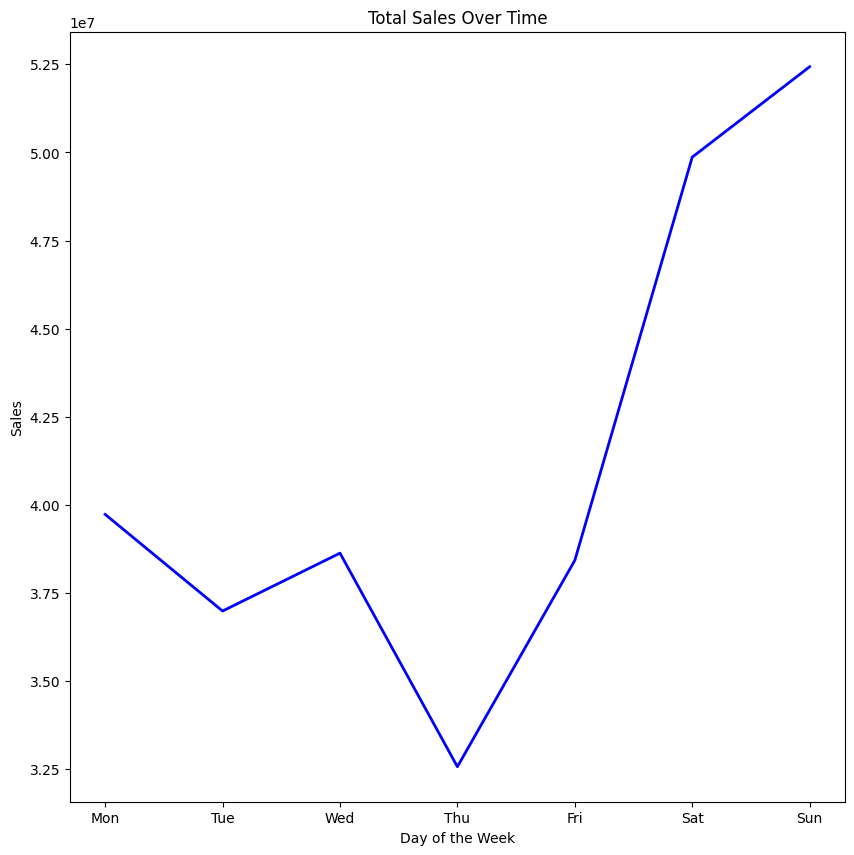

In [149]:
import matplotlib.pyplot as plt

# Assuming 'sales_by_year_dayofweek' is a time series data with days of the week as the index
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 10))
plt.plot(sales_by_year_dayofweek, color='blue', linewidth=2)  # Darker line with increased thickness
plt.title('Total Sales Over Time')
plt.xlabel("Day of the Week")
plt.ylabel("Sales")

# Set x-ticks to the days of the week
plt.xticks(ticks=range(len(days_of_week)), labels=days_of_week)

plt.show()



We can see the the sales are high on weekends as exepcted. However there is significant drop  in sales on thursday. We might need to create a feature like is midweek to accomodate the drop in sales

In [150]:
sales_by_date = df_merged.groupby('date').sales.sum()

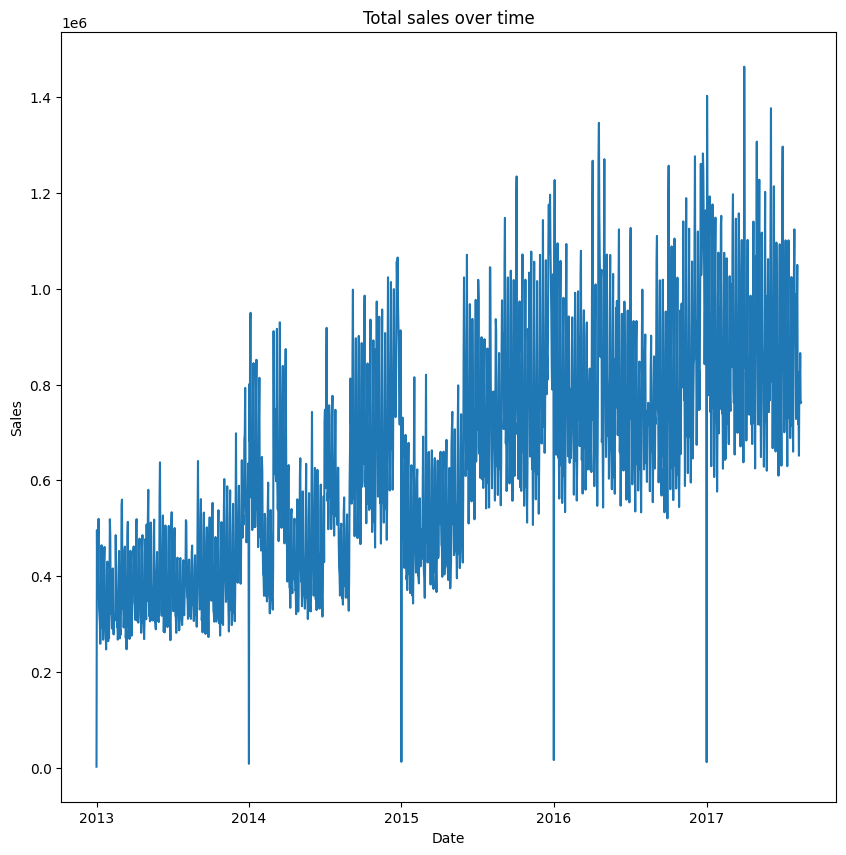

In [151]:
plt.figure(figsize = (10,10))
plt.plot(sales_by_date)
plt.title('Total sales over time')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

The above graph shows the Total sales per date and this shows that there is seasonality in data because we see some spikes in the graph on specific dates. We will have to do some Exploratory data analysis to flatten this data and make this data usable for training.

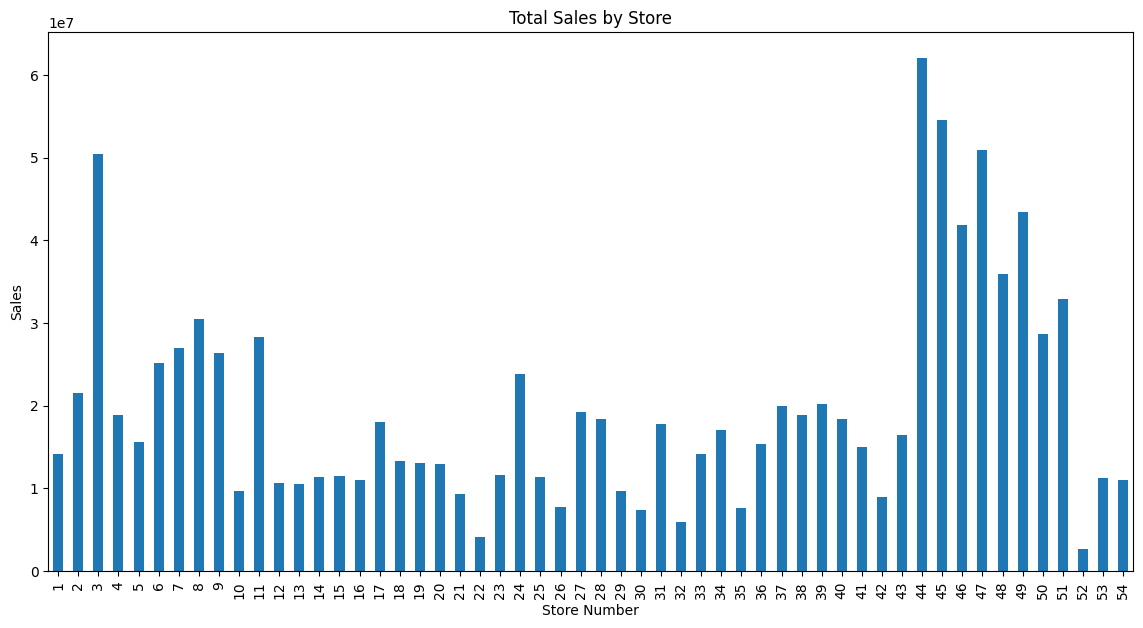

In [152]:
sales_by_store = df_merged.groupby('store_nbr').sales.sum()

plt.figure(figsize=(14, 7))
sales_by_store.plot(kind='bar')
plt.title('Total Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.show()

The above plot shows the store sales per store number . This shows that store # 44 has the highest sales. We can also see significant variations in sales accross stores

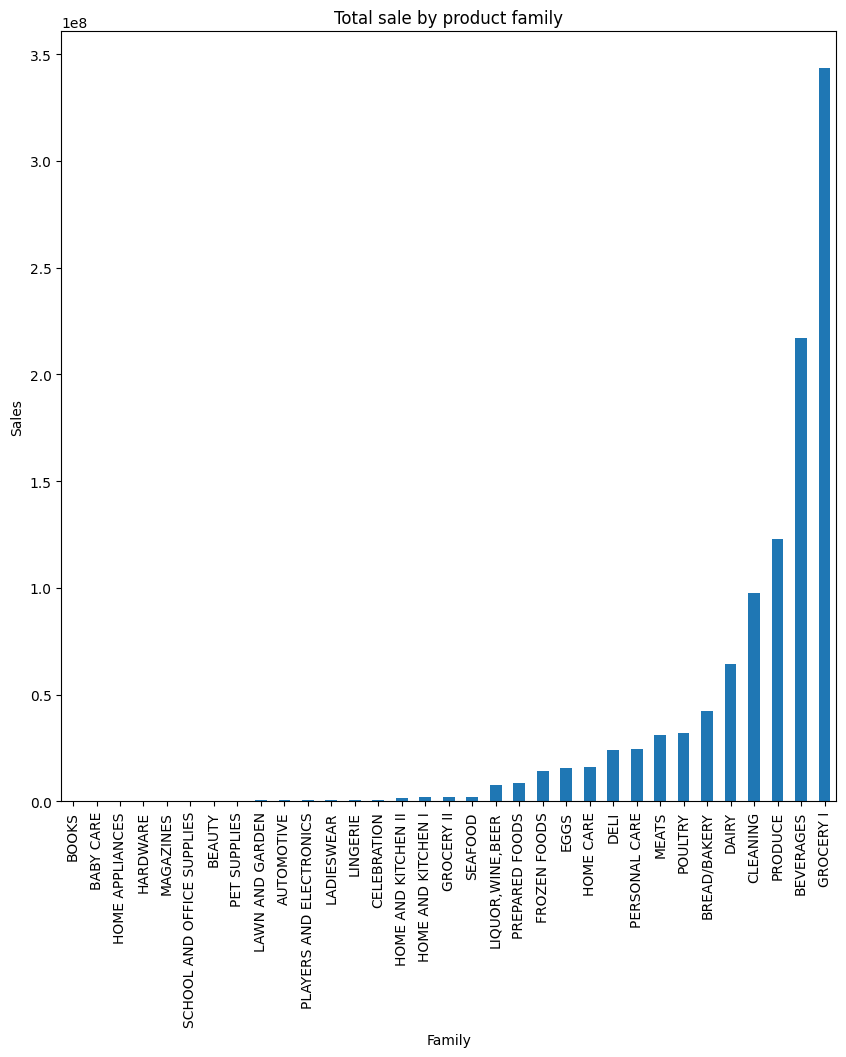

In [153]:
sales_by_family = df_merged.groupby('family').sales.sum().sort_values()

plt.figure(figsize=(10,10))
sales_by_family.plot(kind='bar')
plt.title("Total sale by product family")
plt.xlabel("Family")
plt.ylabel("Sales")
plt.show()

Sales for groceries and beverages are significantly higher compared to other product families. On the other hand, books and baby care products experience the lowest sales. This can be attributed to the specific demand for these items, where groceries serve as daily essentials for most households, while baby care products are only needed by families with infants.These observations indicate that product family plays a crucial role in determining overall sales performance.

In [154]:
fam_weekday_sales = df_merged_nullsimputed.groupby(['family','dayofweek']).sales.agg('sum').reset_index()

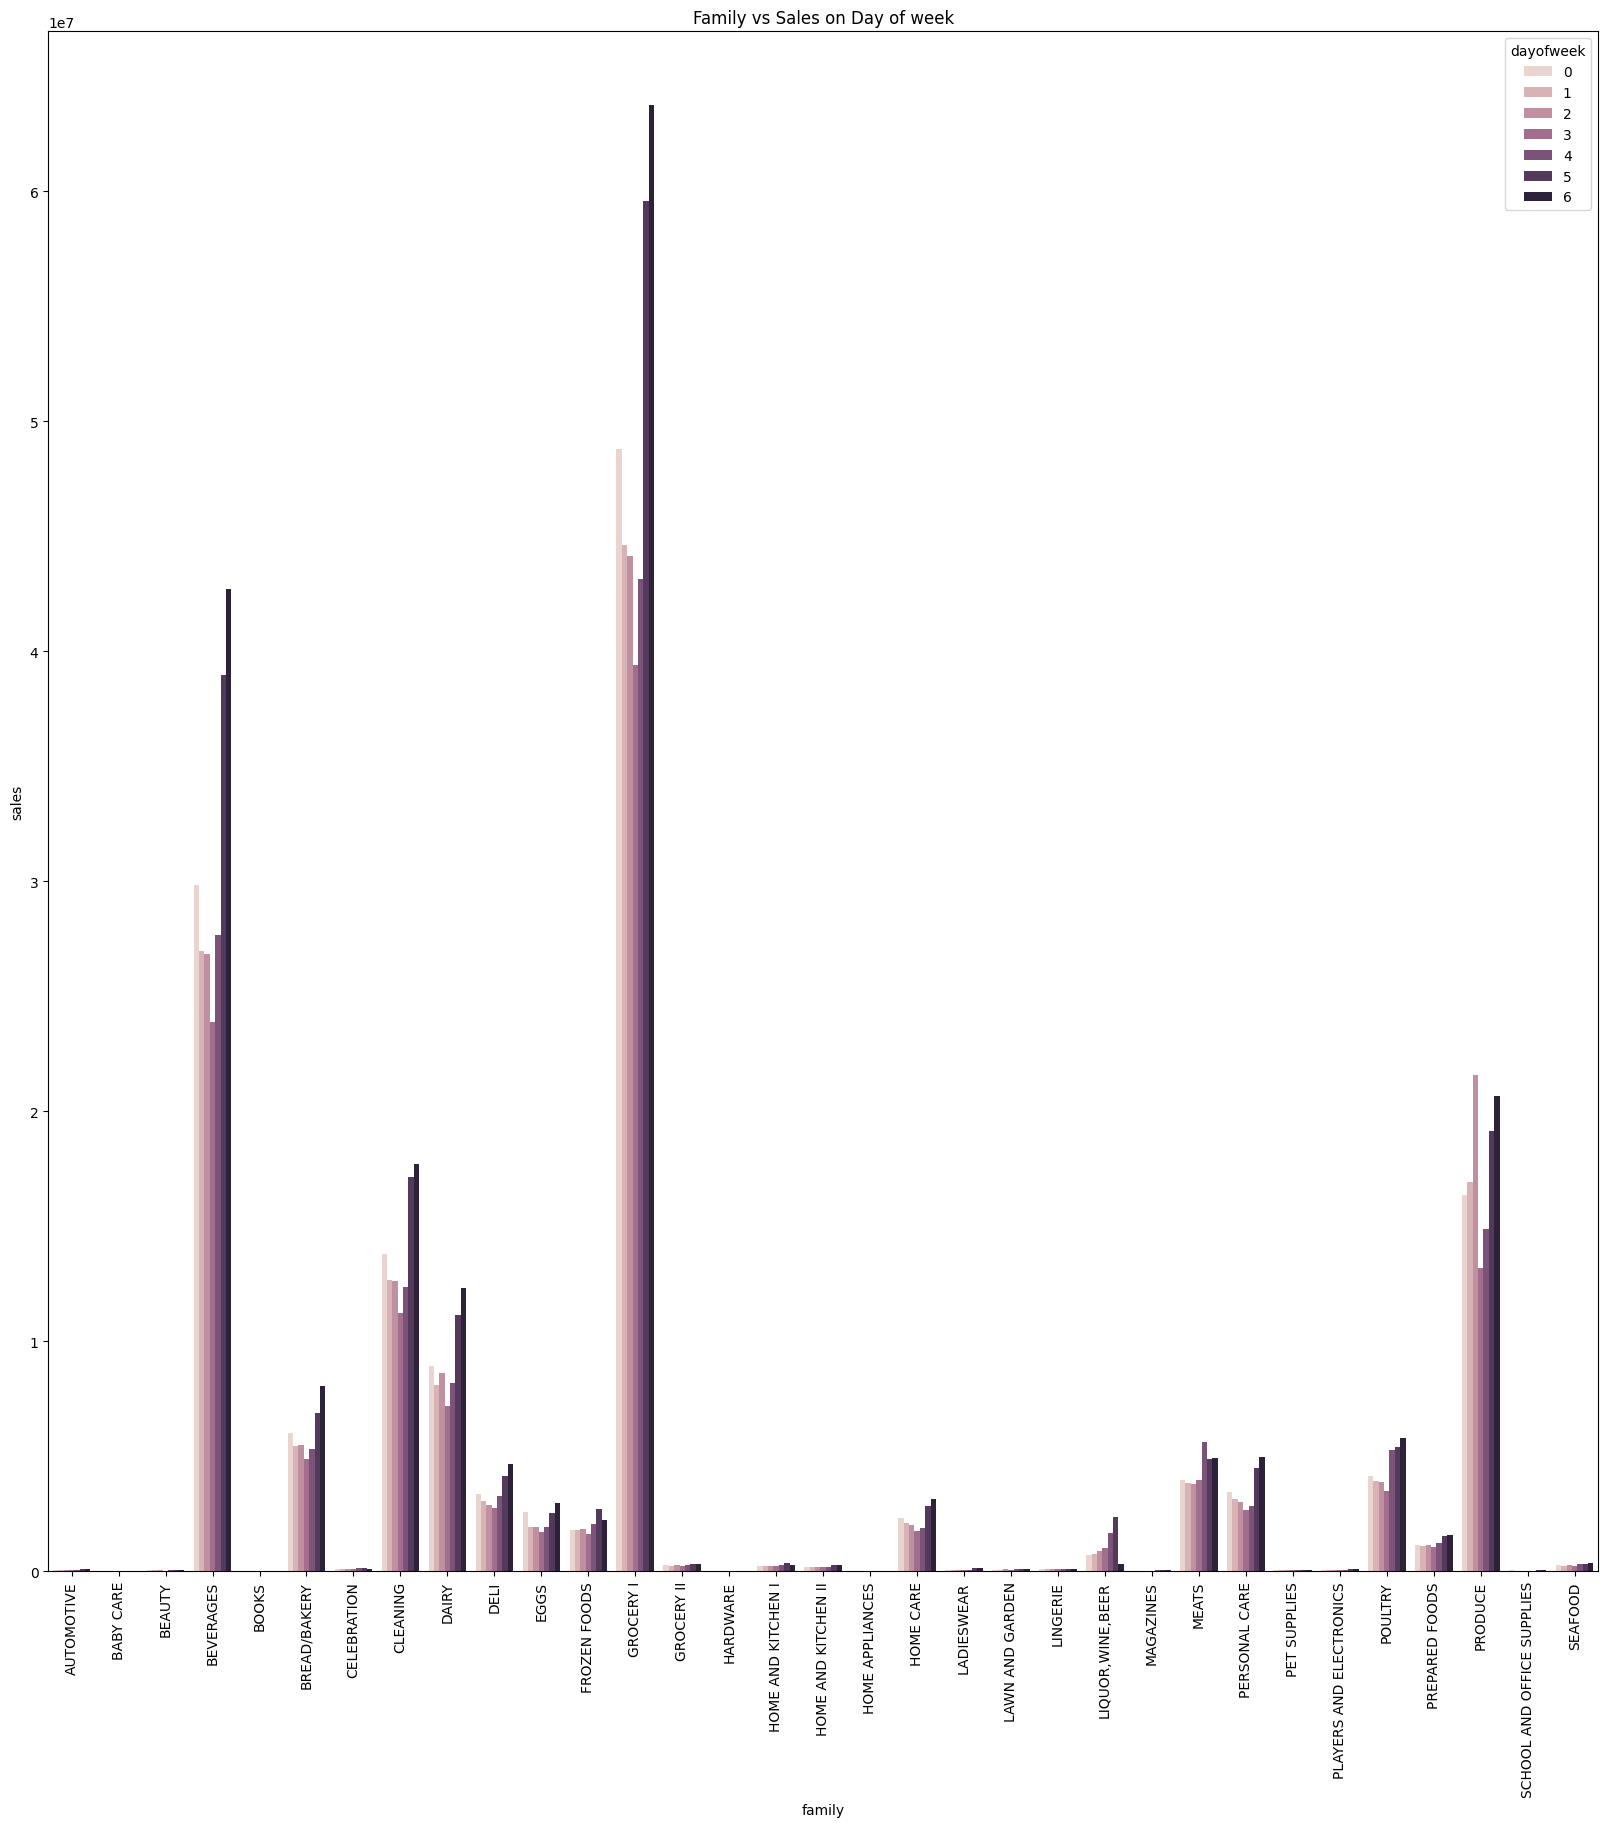

In [155]:
plt.figure(figsize=(20,20))
plt.title("Family vs Sales on Day of week")
sns.barplot(x=fam_weekday_sales.family , y= fam_weekday_sales.sales , hue=fam_weekday_sales.dayofweek)
plt.xticks(rotation=90)
plt.show()

The above plot is for family vs sales with hue on the day of week.
Observations
1. Top 3 selling families are Grocery1, Beverages and Produce.
2. From the pattern in the graph, most sales happen on Sundays (0 = Monday) while other days also follow a similar pattern across.
3. We need to see the difference between Grocery 1 and Grocery 2 products and what products are there in Produce family

In [156]:
#Family vs week number

In [157]:
fam_weeknum_sales = df_merged_nullsimputed.groupby(['family','weeknum']).sales.agg('sum')

In [158]:
fam_weeknum_sales = fam_weeknum_sales.reset_index()

In [159]:
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


Observations for family vs sales with hue on weeknumber 
1. Major sales during mille weeknumber like 20-30 i.e June July and August and then in November and December.
2. We see a high sale of frozen foods in November and December which makes sense due to festive season.
3. We see there is a bunch of holidays in July and August that is why we see a rise in sales during those week numbers as well.

In [160]:
# Explore the holidays data
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

In [161]:
train_holidays = pd.merge(df_train, df_holidays , on = 'date' , how = 'left')

In [162]:
train_holidays['type'].notna().sum()

502524

In [163]:
df_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [164]:
df_transactions.max()

date            2017-08-15
store_nbr               54
transactions          8359
dtype: object

In [165]:
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [166]:
df_merged

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek,weeknum
0,0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1
1,1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1
2,2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1
3,3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1
4,4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,47.57,Quito,Pichincha,B,6,2155.0,2017,8,1,33
3000884,3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,47.57,Quito,Pichincha,B,6,2155.0,2017,8,1,33
3000885,3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,47.57,Quito,Pichincha,B,6,2155.0,2017,8,1,33
3000886,3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,47.57,Quito,Pichincha,B,6,2155.0,2017,8,1,33


In [167]:
b = df_merged.groupby(['date', 'store_type'])['sales'].mean().reset_index()
px.line(b, x='date', y='sales', color='store_type', title='Average Sales Per Store by Type')

The line plot generated by grouping the data by date and store_type shows that the average sales differ significantly across store types. This indicates that store type is an important predictor of sales performance, with certain store types consistently showing higher or lower average sales.

Sales - combined with family and store.


Comparing Sales Variations for the Same Product Families Across Two Stores

Previously, we observed significant differences in sales across product families and store types. Now, to further investigate, we'll plot sales for the same product families across two stores and analyze whether the sales variations are consistent between them.

We choose 44 because it has highest sales and  31 as it has medium sales 



In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for store 44 and specific families
selected_families = ['grocery 1', 'books', 'poultry']
store_44_selected_families = df_merged['family'].isin(selected_families)

# Define selected families
selected_families = ['BEAUTY', 'POULTRY', 'PREPARED FOODS', 'SEAFOOD', 'LAWN AND GARDEN']

# Filter for store 44
store_44_data = df_merged[(df_merged['store_nbr'] == 44)]
store_44_selected_families = store_44_data[store_44_data['family'].isin(selected_families)]

# Filter for store 31
store_31_data = df_merged[(df_merged['store_nbr'] == 31)]
store_31_selected_families = store_31_data[store_31_data['family'].isin(selected_families)]

# Ensure that the data is a DataFrame, not a Series
if isinstance(store_44_selected_families, pd.Series):
    store_44_selected_families = store_44_selected_families.to_frame()
if isinstance(store_31_selected_families, pd.Series):
    store_31_selected_families = store_31_selected_families.to_frame()
    
    # Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plot for store 44
sns.lineplot(data=store_44_selected_families, x=store_44_selected_families.index, y='sales', hue='family', ax=axes[0])
axes[0].set_title('Sales for Store 44 - Selected Families')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sales')
axes[0].legend(title='Family')
axes[0].grid(True)

# Plot for store 31
sns.lineplot(data=store_31_selected_families, x=store_31_selected_families.index, y='sales', hue='family', ax=axes[1])
axes[1].set_title('Sales for Store 31 - Selected Families')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Sales')
axes[1].legend(title='Family')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()



The graph reveals that both stores exhibit different sales scales and variations across product families. Notably, there are sudden spikes in poultry sales in Store 31, which are absent in Store 44. Interestingly, such spikes are not observed for other product families.

This observation suggests that we do not have a homogeneous time series for overall sales. Instead, each store has its own distinct time series for each product family. Therefore, it would be more appropriate to split the data and model individual time series for sales by store and by product family. This approach will better capture the unique dynamics in each store and family combination, leading to more accurate predictions.

Also since we are modelling per store, we can drop the store specific features like store type, location